In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, precision_score, recall_score, f1_score,mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, Normalizer, Binarizer,OrdinalEncoder,RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
df=sns.load_dataset('titanic')
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [150]:
categorical_cols = ['sex', 'embarked', 'class','who', 'adult_male', 'deck', 'embark_town', 'alive' ,'alone']
numeric_cols=['age', 'sibsp', 'parch', 'fare', 'pclass']

imputer=SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

imputer2=SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer2.fit_transform(df[categorical_cols])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3.0,male,22.000000,1.0,0.0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1.0,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3.0,female,26.000000,0.0,0.0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1.0,female,35.000000,1.0,0.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3.0,male,35.000000,0.0,0.0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2.0,male,27.000000,0.0,0.0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1.0,female,19.000000,0.0,0.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3.0,female,29.699118,1.0,2.0,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1.0,male,26.000000,0.0,0.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [151]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [152]:
#Label Encoding
le=LabelEncoder()
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])
df



,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3.0,1,22.000000,1.0,0.0,7.2500,2,2,1,1,2,2,0,0
1,1,1.0,0,38.000000,1.0,0.0,71.2833,0,0,2,0,2,0,1,0
2,1,3.0,0,26.000000,0.0,0.0,7.9250,2,2,2,0,2,2,1,1
3,1,1.0,0,35.000000,1.0,0.0,53.1000,2,0,2,0,2,2,1,0
4,0,3.0,1,35.000000,0.0,0.0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2.0,1,27.000000,0.0,0.0,13.0000,2,1,1,1,2,2,0,1
887,1,1.0,0,19.000000,0.0,0.0,30.0000,2,0,2,0,1,2,1,1
888,0,3.0,0,29.699118,1.0,2.0,23.4500,2,2,2,0,2,2,0,0
889,1,1.0,1,26.000000,0.0,0.0,30.0000,0,0,1,1,2,0,1,1


In [153]:
#Using Robust Scalar
scaler=RobustScaler()
df[numeric_cols]=scaler.fit_transform(df[numeric_cols])


oe=OrdinalEncoder()
df[categorical_cols]=oe.fit_transform(df[categorical_cols])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0.0,1.0,-0.592240,1.0,0.0,-0.312011,2.0,2.0,1.0,1.0,2.0,2.0,0.0,0.0
1,1,-2.0,0.0,0.638529,1.0,0.0,2.461242,0.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0
2,1,0.0,0.0,-0.284548,0.0,0.0,-0.282777,2.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0
3,1,-2.0,0.0,0.407760,1.0,0.0,1.673732,2.0,0.0,2.0,0.0,2.0,2.0,1.0,0.0
4,0,0.0,1.0,0.407760,0.0,0.0,-0.277363,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-1.0,1.0,-0.207624,0.0,0.0,-0.062981,2.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
887,1,-2.0,0.0,-0.823009,0.0,0.0,0.673281,2.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0
888,0,0.0,0.0,0.000000,1.0,2.0,0.389604,2.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0
889,1,-2.0,1.0,-0.284548,0.0,0.0,0.673281,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0


In [154]:
X=df.drop(['survived','alive'],axis=1)
y=df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model = DecisionTreeClassifier(max_depth=3, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1:', f1_score(y_test, y_pred, average='macro'))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy 0.8379888268156425
Precision: 0.8367892540427752
Recall: 0.829905467552376
F1: 0.8326401650707677
Confusion Matrix: [[91 12]
 [17 59]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       103
           1       0.83      0.78      0.80        76

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



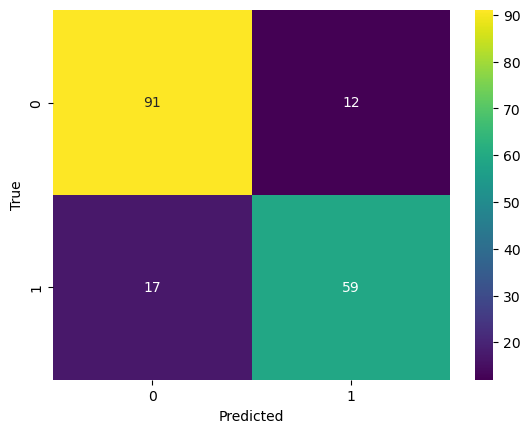

In [155]:
#Making Heatmap of confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# **Decision Tree as a Regressor**

In [156]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [158]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
numeric_cols=['tip', 'size']
categorical_cols=['sex', 'smoker', 'day', 'time']

X=df.drop('total_bill',axis=1)
y=df['total_bill']

preprocessor=ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(), categorical_cols),
    ('scaler', StandardScaler(), numeric_cols)
], remainder='passthrough')

model=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluating The Model
print('MSE',mean_squared_error(y_test, y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE',mean_absolute_error(y_test, y_pred))
print('R2',r2_score(y_test, y_pred))


MSE 56.736031405895694
RMSE 7.532332401447489
MAE 5.748979591836735
R2 0.42317856466175974
